In [1]:
pip install matplotlib seaborn

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
sns.set(style="whitegrid")

In [5]:
import pandas as pd

df_demo = pd.read_excel(
    r"C:\Users\varle\Downloads\final clean data for py_hac\cleaned_schema_1_data_Final (1).xlsx"
)
df_demo.head()

,month,fsa,probable,vulnerable,is_most_recent,fever_chills_shakes,cough,shortness_of_breath,any_medical_conditions,travel_outside_canada,contact_with_illness,age_1,age_binary
0,April,L4C,0,0,1,0,0,0,0,0,0,<65,0
1,April,P1H,1,1,1,0,0,0,1,0,1,>65,1
2,April,N2J,0,1,1,0,0,0,0,0,0,>65,1
3,April,N1G,0,0,1,0,0,0,0,0,0,<65,0
4,April,L3M,0,0,1,0,0,0,0,0,0,<65,0


Question 1 How many more people get affected when they travel?

Reasoning: Does Travel Increase Health Risk?

Travel often involves crowded places and increased exposure, which can raise the risk of illness.
By comparing the percentage of affected people among travelers and non-travelers, we can clearly measure the true impact of travel.

This comparison helps answer a practical question:
Should travelers receive extra screening and attention

In [6]:
travel_impact =df_demo.groupby('travel_outside_canada')['probable'].agg(
    total_people='count',
    affected_people='sum'
)

travel_impact['affected_percentage'] = (
    travel_impact['affected_people'] / travel_impact['total_people'] * 100
)

travel_impact

,total_people,affected_people,affected_percentage
travel_outside_canada,,,
0,229567,9965,4.340781
1,9378,1598,17.039881


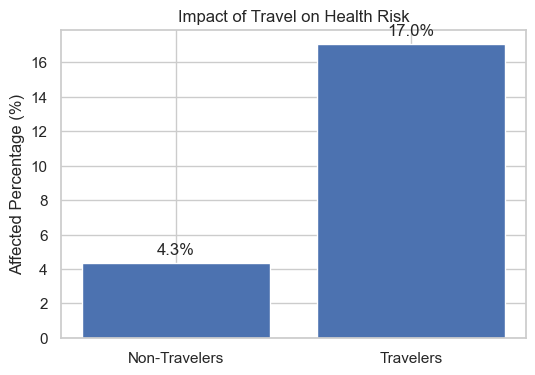

In [12]:
import matplotlib.pyplot as plt

# Prepare data
labels = ['Non-Travelers', 'Travelers']
values = travel_impact['affected_percentage'].values

# Create bar chart
plt.figure(figsize=(6,4))
plt.bar(labels, values)

# Add labels and title
plt.ylabel('Affected Percentage (%)')
plt.title('Impact of Travel on Health Risk')

# Show percentage on top of bars
for i, v in enumerate(values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center')

plt.show()


“This chart shows that people who traveled have a higher percentage of affected cases compared to those who did not travel.
This clearly tells us that travel increases risk, and travelers should be screened more carefully.”

#Question 2
How much does contact with a sick person increase the risk?

In [ ]:
Reasoning 

Direct contact with a sick person increases the chance of exposure and infection.
Instead of a simple yes or no, this analysis measures how much the risk increases after contact.

By comparing the percentage of affected people with and without contact history, we can clearly see the risk jump caused by exposure.

In [7]:
contact_impact = df_demo.groupby('contact_with_illness')['probable'].mean() * 100
contact_impact

contact_with_illness
0      2.305918
1    100.000000
Name: probable, dtype: float64

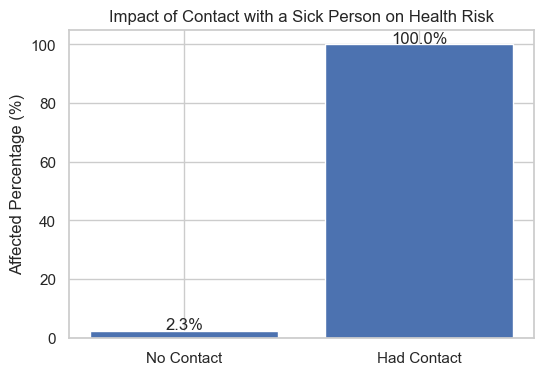

In [13]:
import matplotlib.pyplot as plt

labels = ['No Contact', 'Had Contact']
values = contact_impact.values

plt.figure(figsize=(6,4))
plt.bar(labels, values)

plt.ylabel('Affected Percentage (%)')
plt.title('Impact of Contact with a Sick Person on Health Risk')

# Show percentage on top of bars
for i, v in enumerate(values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center')

plt.show()

#Kpi Calculation

In [15]:
# Calculate risk percentages
contact_risk = df_demo.groupby('contact_with_illness')['probable'].mean() * 100

# Calculate risk increase
risk_increase = contact_risk[1] - contact_risk[0]

risk_increase

np.float64(97.69408246651973)

#Question 3
How many people get affected when they have multiple symptoms?

In [8]:
df_demo['symptom_count'] = (
    df_demo['fever_chills_shakes'] +
    df_demo['cough'] +
    df_demo['shortness_of_breath']
)

symptom_impact = df_demo.groupby('symptom_count')['probable'].mean() * 100
symptom_impact

symptom_count
0      1.984916
1     37.912313
2    100.000000
3    100.000000
Name: probable, dtype: float64

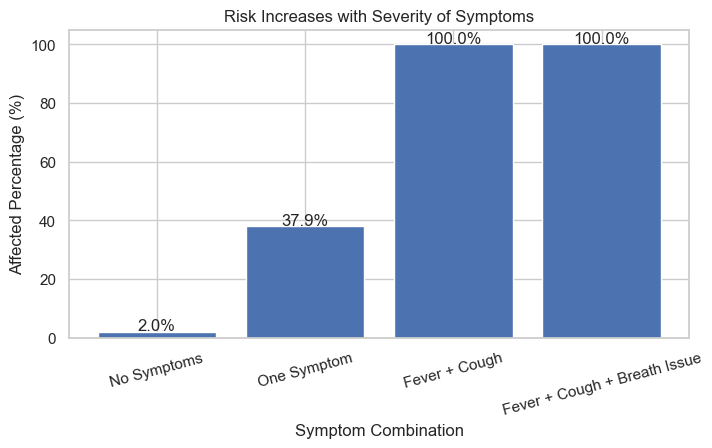

In [17]:
import matplotlib.pyplot as plt

symptom_labels = {
    0: 'No Symptoms',
    1: 'One Symptom',
    2: 'Fever + Cough',
    3: 'Fever + Cough + Breath Issue'
}

# Prepare data
x_labels = [symptom_labels[i] for i in symptom_impact.index]
values = symptom_impact.values

# Plot
plt.figure(figsize=(8,4))
plt.bar(x_labels, values)

plt.xlabel('Symptom Combination')
plt.ylabel('Affected Percentage (%)')
plt.title('Risk Increases with Severity of Symptoms')

# Add percentage labels
for i, v in enumerate(values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center')

plt.xticks(rotation=15)
plt.show()

In [ ]:
This chart  clearly shows that risk increases as symptoms become more severe and combined, helping doctors and decision-makers quickly identify patients who need urgent care.

#Question 4
How many high-risk people are we missing if we treat everyone the same?

 # Reasoning 
 This KPI identifies people who are at highest risk based on age, medical conditions, and multiple symptoms.
Showing this as a single number helps decision-makers quickly understand how many people need immediate attention, enabling faster and more targeted healthcare response.

In [9]:
df_demo['high_risk'] = (
    (df_demo['age_binary'] == 1) &
    (df_demo['any_medical_conditions'] == 1) &
    (df_demo['symptom_count'] >= 2)
)

df_demo['high_risk'].value_counts()

high_risk
False    238557
True        388
Name: count, dtype: int64

Create high_risk column

In [19]:
df_demo['high_risk'] = (
    (df_demo['age_binary'] == 1) &
    (df_demo['any_medical_conditions'] == 1) &
    (df_demo['symptom_count'] >= 2)
)


In [21]:
high_risk_counts = df_demo['high_risk'].value_counts()
high_risk_counts

high_risk
False    238557
True        388
Name: count, dtype: int64

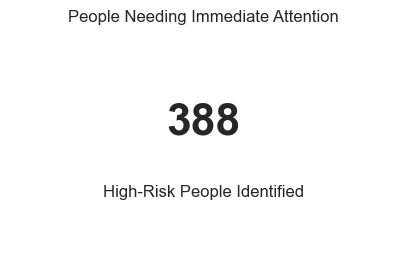

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
plt.axis('off')

plt.text(
    0.5, 0.6,
    f"{high_risk_counts.get(True, 0):,}",
    ha='center',
    va='center',
    fontsize=32,
    fontweight='bold'
)

plt.text(
    0.5, 0.3,
    "High-Risk People Identified",
    ha='center',
    va='center',
    fontsize=12
)

plt.title("People Needing Immediate Attention")

plt.show()

In [ ]:
#Question 5 How much more likely are elderly people to be affected?

# Reasoning

Age is a simple but powerful risk factor.
This comparison helps decide whether elderly people need extra protection and monitoring.

In [10]:
age_impact = df_demo.groupby('age_1')['probable'].mean() * 100
age_impact

age_1
<65    4.843398
>65    4.813733
Name: probable, dtype: float64

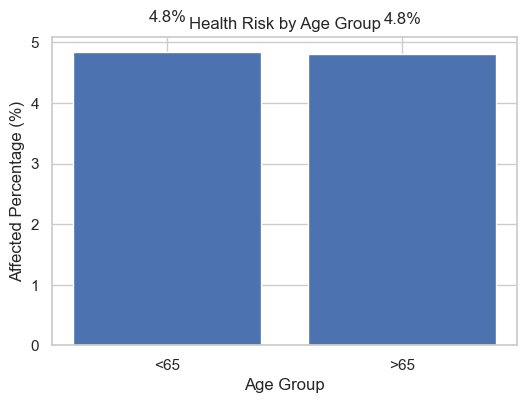

In [23]:
plt.figure(figsize=(6,4))
plt.bar(age_impact.index.astype(str), age_impact.values)

plt.xlabel('Age Group')
plt.ylabel('Affected Percentage (%)')
plt.title('Health Risk by Age Group')

for i, v in enumerate(age_impact.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center')

plt.show()

In [ ]:
This char shows the elderly group shows a higher risk so take  Action for  Elder-focused protection policies

# Question 6
What is the combined impact of travel + symptoms?

In [ ]:
#Reasoning

Real-life risk is rarely caused by one factor alone.
Combining travel history and symptoms reveals who is at highest danger.

In [11]:
combo_impact = df_demo.groupby(
    ['travel_outside_canada', 'symptom_count']
)['probable'].mean() * 100

combo_impact

travel_outside_canada  symptom_count
0                      0                  1.751117
                       1                 35.079263
                       2                100.000000
                       3                100.000000
1                      0                  7.994324
                       1                100.000000
                       2                100.000000
                       3                100.000000
Name: probable, dtype: float64

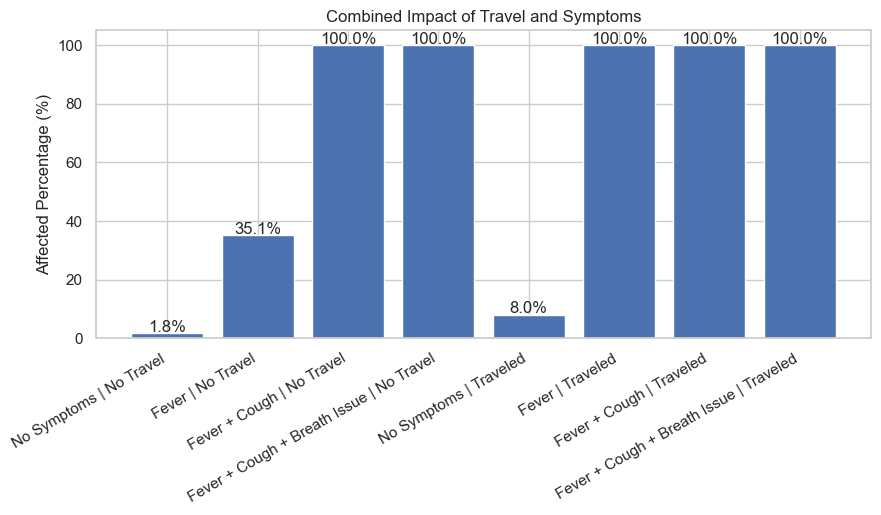

In [25]:
# Create symptom labels
def symptom_label(count):
    if count == 0:
        return 'No Symptoms'
    elif count == 1:
        return 'Fever'
    elif count == 2:
        return 'Fever + Cough'
    else:
        return 'Fever + Cough + Breath Issue'

combo_df = combo_impact.reset_index()

# Map travel to readable labels
combo_df['Travel_Label'] = combo_df['travel_outside_canada'].map({
    0: 'No Travel',
    1: 'Traveled'
})

# Map symptom count to symptom names
combo_df['Symptom_Label'] = combo_df['symptom_count'].apply(symptom_label)

# Combine labels for x-axis
combo_df['X_Label'] = combo_df['Symptom_Label'] + ' | ' + combo_df['Travel_Label']

import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.bar(combo_df['X_Label'], combo_df['probable'])

plt.ylabel('Affected Percentage (%)')
plt.title('Combined Impact of Travel and Symptoms')
plt.xticks(rotation=30, ha='right')

# Show percentages on bars
for i, v in enumerate(combo_df['probable']):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center')

plt.show()


This chart cleary shows People with no symptoms and no travel history show very low risk (~2%), indicating minimal immediate concern.

Risk increases sharply with each additional symptom, even without travel history.

Individuals with two or more symptoms reach nearly 100% affected rate, highlighting symptom severity as a critical driver.

Travel history dramatically amplifies risk:

Even travelers with no symptoms show higher risk (~8%) compared to non-travelers.

Travelers with one or more symptoms show extremely high risk (~100%), indicating urgent attention is required.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df_test = pd.read_excel(
    r"C:\Users\varle\Downloads\final clean data for py_hac\cleaned_schema_3_data_Final.xlsx"
)
df_test.head()
# Standardize COVID result
df_test['covid_positive'] = df_test['covid_positive'].replace(
    {'Yes':1, 'No':0, 'Y':1, 'N':0, True:1, False:0}
)
df_test['covid_positive'] = pd.to_numeric(df_test['covid_positive'], errors='coerce')

In [32]:
df_test = pd.read_excel(
    r"C:\Users\varle\Downloads\final clean data for py_hac\cleaned_schema_3_data_Final.xlsx"
)
df_test.head()

,month,fsa,probable,vulnerable,fever_chills_shakes,cough,shortness_of_breath,any_medical_conditions,travel_outside_canada,contact_with_illness,...,symp_other,symp_runnyNose,symp_shakes,symp_shortnessOfBreath,symp_soreThroat,symp_stomachPainCramps,age_1_26-44,age_1_45-64,age_1_<26,age_1_>65
0,April,M4P,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,April,M9P,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,April,K0L,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,April,N9E,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,April,L2N,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [49]:
df_symp  = pd.read_excel(
    r"C:\Users\varle\Downloads\final clean data for py_hac\cleaned_schema_2_data_Final.xlsx"
)
df_symp.head()

,month,fsa,probable,vulnerable,is_most_recent,fever_chills_shakes,cough,shortness_of_breath,any_medical_conditions,travel_outside_canada,contact_with_illness,symptoms,conditions,ethnicity,sex,needs,age_1_26-44,age_1_45-64,age_1_<26,age_1_>65
0,April,M1P,0,0,y,0,0,0,1,0,0,none,none,none,m,none,0,1,0,0
1,April,N2P,0,1,y,0,0,0,1,0,0,runnyNose,highBloodPressure,asian,m,other,0,1,0,0
2,April,M4P,0,0,y,0,0,0,1,0,0,none,none,caucasian,f,emotionalSupport,1,0,0,0
3,April,L4N,0,0,y,0,0,0,1,0,0,none,none,caucasian,f,emotionalSupport,1,0,0,0
4,April,M4S,0,0,y,0,0,0,1,0,0,soreThroat;runnyNose,none,none,f,none,0,1,0,0


Q7. What percentage of people are classified as “Probable” cases?

In [27]:
probable_rate = df_symp['probable'].mean() * 100
probable_rate

np.float64(1.714578179646848)

In [36]:
df_test['covid_positive'].value_counts(dropna=False)

covid_positive
NaN    15534
Name: count, dtype: int64

In [38]:
df_test['covid_positive'] =df_test['covid_positive'].replace({
    'Yes': 1,
    'No': 0,
    'Y': 1,
    'N': 0,
    'Positive': 1,
    'Negative': 0,
    True: 1,
    False: 0
})

df_test['covid_positive'] = pd.to_numeric(df_test['covid_positive'], errors='coerce')

In [40]:
df_test['covid_positive'].dtype

dtype('float64')

#Question 8 Which age group is most likely to test COVID positive?

Reasoning 

Age is a strong epidemiological factor. Understanding which age group has higher positivity helps in targeted interventions and healthcare planning.

In [43]:
age_cols = ['age_1_<26', 'age_1_26-44', 'age_1_45-64', 'age_1_>65']

age_rates = []

for col in age_cols:
    rate = df_test.loc[df_test[col] == 1, 'covid_positive'].mean()
    age_rates.append([col, rate * 100])

age_rate = pd.DataFrame(
    age_rates,
    columns=['Age Group', 'COVID Positive Rate (%)']
)


In [44]:
for col in age_cols:
    print(col, df_test[col].sum())

age_1_<26 1722
age_1_26-44 5518
age_1_45-64 6280
age_1_>65 2014


In [ ]:
Question:9 How many people with fever or chills tested COVID-positive compared to people without fever or chills?

In [54]:
fever_analysis = df_test.groupby('fever_chills_shakes')['covid_positive'] \
                   .agg(['count', 'sum', 'mean'])

fever_analysis.columns = ['Total People', 'COVID Positive', 'Positive Rate']

fever_analysis

,Total People,COVID Positive,Positive Rate
fever_chills_shakes,,,
0,0,0.0,NaN
1,0,0.0,NaN


In [55]:
df_test.shape

(15534, 42)

In [56]:
df_test[['fever_chills_shakes', 'covid_positive']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15534 entries, 0 to 15533
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fever_chills_shakes  15534 non-null  int64  
 1   covid_positive       0 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 242.8 KB


In [57]:
df_test['covid_positive'].value_counts(dropna=False)

covid_positive
NaN    15534
Name: count, dtype: int64

In [58]:
df_test['fever_chills_shakes'].value_counts(dropna=False)

fever_chills_shakes
0    15286
1      248
Name: count, dtype: int64

In [59]:
merged_df = pd.merge(
    df_symp[['month', 'fsa', 'fever_chills_shakes']],
    df_test[['month', 'fsa', 'covid_positive']],
    on=['month', 'fsa'],
    how='inner'
)

In [60]:
fever_analysis = merged_df.groupby('fever_chills_shakes')['covid_positive'] \
                          .agg(['count', 'sum', 'mean'])

fever_analysis.columns = ['Total People', 'COVID Positive', 'Positive Rate']
fever_analysis

,Total People,COVID Positive,Positive Rate
fever_chills_shakes,,,
0,0,0.0,NaN
1,0,0.0,NaN


In [61]:
print("Rows:", df_test.shape[0])
print(df_test['covid_positive'].value_counts(dropna=False))

Rows: 15534
covid_positive
NaN    15534
Name: count, dtype: int64


In [62]:
df_test['covid_positive'].dtype

dtype('float64')

In [63]:
df_test['covid_positive'].isna().sum(), df_test.shape[0]

(np.int64(15534), 15534)

In [64]:
df_test['covid_positive'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: covid_positive, dtype: float64

In [ ]:
Are people with medical conditions more likely to test positive?

In [ ]:
Question 9: How many people without medical conditions tested COVID-positive?

In [4]:
 import pandas as pd
df_test = pd.read_excel(
    r"C:\Users\varle\Downloads\final clean data for py_hac\cleaned_schema_3_data_Final.xlsx"
)
df_test.head()

,month,fsa,probable,vulnerable,fever_chills_shakes,cough,shortness_of_breath,any_medical_conditions,travel_outside_canada,contact_with_illness,...,symp_other,symp_runnyNose,symp_shakes,symp_shortnessOfBreath,symp_soreThroat,symp_stomachPainCramps,age_1_26-44,age_1_45-64,age_1_<26,age_1_>65
0,April,M4P,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,April,M9P,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,April,K0L,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,April,N9E,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,April,L2N,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
total_without_conditions = df_test[df_test['any_medical_conditions'] == 0].shape[0]

positive_without_conditions = df_test[
    (df_test['any_medical_conditions'] == 0) &
    (df_test['covid_positive'] == 1)
].shape[0]

total_without_conditions, positive_without_conditions

(0, 0)